In [1]:
import pandas as pd

In [11]:
df = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['label', 'text'])

In [13]:
df

label                                               text
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [15]:
df.shape

(5572, 2)

In [17]:
# install nltk natural language tool kit
!pip install nltk

In [27]:
import nltk

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/arun-
[nltk_data]     varma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
sent = 'Hello friends! How are you?'

In [43]:
from nltk.tokenize import word_tokenize

In [45]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/arun-varma/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [47]:
nltk.word_tokenize(sent)

['Hello', 'friends', '!', 'How', 'are', 'you', '?']

In [49]:
from nltk.corpus import stopwords
swords = stopwords.words('english')

In [51]:
swords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [53]:
clean = [word for word in word_tokenize(sent) if word not in swords]

In [55]:
clean

['Hello', 'friends', '!', 'How', '?']

In [67]:
# Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [69]:
clean = [ps.stem(word) for word in word_tokenize(sent) if word not in swords]
clean

['hello', 'friend', '!', 'how', '?']

In [71]:
sent = 'Hello friends! How are you? We will be learning Python today.'

In [75]:
def clean_text(sent):
    tokens = word_tokenize(sent)
    clean = [word for word in tokens
            if word.isdigit() or word.isalpha()]
    clean = [ps.stem(word) for word in clean if word not in swords]
    return clean

In [77]:
clean_text(sent)

['hello', 'friend', 'how', 'we', 'learn', 'python', 'today']

In [79]:
# Pre-processing
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
tfidf = TfidfVectorizer(analyzer = clean_text)

In [83]:
x = df['text']
y = df['label']

In [85]:
x_new = tfidf.fit_transform(x)

In [87]:
x.shape

(5572,)

In [89]:
x_new.shape

(5572, 6513)

In [91]:
x_new

<5572x6513 sparse matrix of type '<class 'numpy.float64'>'
	with 52578 stored elements in Compressed Sparse Row format>

In [95]:
# We have done vectorization after cleaning

In [97]:
y.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [99]:
# Cross Validation
from sklearn.model_selection import train_test_split

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state=0, test_size=0.25)

In [105]:
x_train.shape

(4179, 6513)

In [107]:
x_test.shape

(1393, 6513)

In [113]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [115]:
nb.fit(x_train.toarray(), y_train)

GaussianNB()

In [117]:
y_pred = nb.predict(x_test.toarray())

In [119]:
y_test.value_counts()

label
ham     1208
spam     185
Name: count, dtype: int64

In [121]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [123]:
from sklearn.metrics import accuracy_score, classification_report

In [125]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.87      0.92      1208
        spam       0.51      0.89      0.65       185

    accuracy                           0.87      1393
   macro avg       0.75      0.88      0.79      1393
weighted avg       0.92      0.87      0.89      1393



In [127]:
accuracy_score(y_test, y_pred)

0.8729361091170137

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
rf = RandomForestClassifier(random_state=0)

In [141]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [143]:
y_pred = rf.predict(x_test)

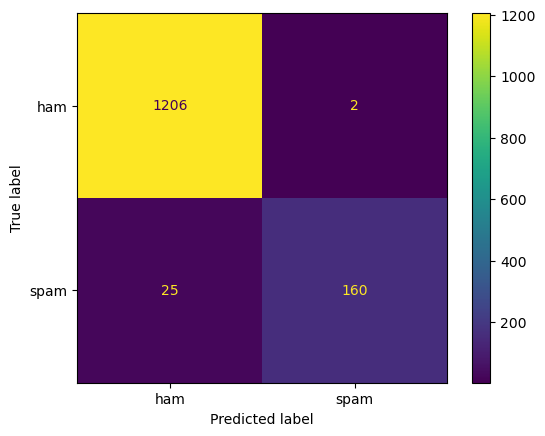

In [145]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [147]:
accuracy_score(y_test, y_pred)

0.9806173725771715

In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.86      0.92       185

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [151]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred = log.predict(x_test)
accuracy_score(y_test, y_pred)

0.9641062455132807

In [153]:
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

In [155]:
params = {
    'criterion':['gini', 'entropy'],
    'max_features':['sqrt', 'log2'],
    'random_state':[0,1,2,3,4],
    'class_weight':['balanced', 'balanced_subsample']
}

In [159]:
grid = GridSearchCV(rf, param_grid=params, cv=5, scoring='accuracy')

In [161]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [0, 1, 2, 3, 4]},
             scoring='accuracy')

In [163]:
rf = grid.best_estimator_

In [165]:
y_pred = rf.predict(x_test)

In [167]:
accuracy_score(y_test, y_pred)

0.9777458722182341